# Ejercicio 4.2.

In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt

### Características del recinto

In [2]:
#Dimensiones
d=13
h0=4
h1=7
w0=6
w1=16

In [3]:
#Superficies:
sx1=w0*h0 #dirección "x"
sx2=w1*h1
sz3=((d*(h1-h0))/2)+h0*d #dirección "z"
sz4=((d*(h1-h0))/2)+h0*d
sy5=((w1+w0)/2)*np.sqrt(d**2-(((w1-w0)**2)/4)) #dirección "y"
sy6=((w1+w0)/2)*np.sqrt((d**2+(h1-h0)**2)-(((w1-w0)**2)/4))
stot=sx1+sx2+sz3+sz4+sy5+sy6
print(sx1,sx2,sz3,sz4,sy5,sy6)
print(stot)

24 112 71.5 71.5 132.0 136.0624856453828
547.0624856453828


In [4]:
#Volumen
V1=(np.sqrt(d**2-(((w1-w0)**2)/4))*(h1-h0)*w0)/2
V2=(np.sqrt(d**2-(((w1-w0)**2)/4))*(h1-h0)*(w1-w0)*2)/6
V3=np.sqrt(d**2-(((w1-w0)**2)/4))*((h0*(w1+w0))/2)
V=V1+V2+V3
print(V)

756.0


In [5]:
#Frecuencias
frec=(125,250,500,1000,2000,4000)

### Coeficientes de Absorción del hormigón

In [6]:
#Coeficientes de abs. según la frecuencia
a125=0.01
a250=0.02
a500=0.03
a1000=0.04
a2000=0.05
a4000=0.07
arrayAbs=[a125,a250,a500,a1000,a2000,a4000]
print(abs)

<built-in function abs>


### Modelo de Sabine

In [7]:
#Sabine

#Para crear arreglo
arraySabine=[]

#Cálculo T60
for i in (arrayAbs): 
    
    T60=(0.161*V)/((sx1*i)+(sx2*i)+(sz3*i)+(sz4*i)+(sy5*i)+(sy6*i))
    
    arraySabine.append(T60)
    
print(arraySabine)

[22.24901235119581, 11.124506175597904, 7.416337450398604, 5.562253087798952, 4.449802470239161, 3.178430335885115]


Text(0.5, 1.0, 'Modelo de Sabine')

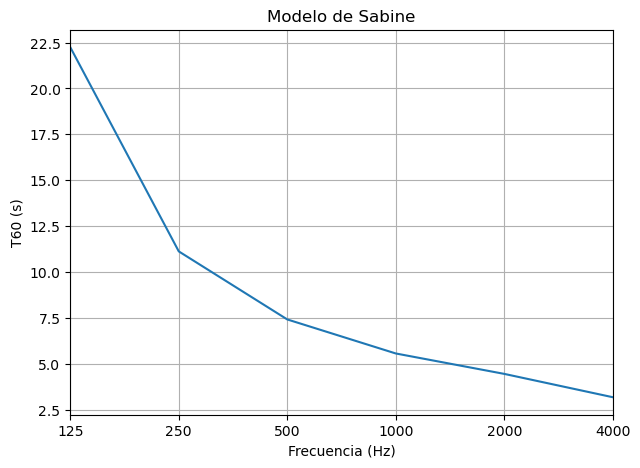

In [8]:
#Gráfica T60 Sabine
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(frec,arraySabine)

ax.set_xlabel('Frecuencia (Hz)')
ax.set_xscale('log') # escala logaritmica eje x
ax.set_xticks(frec) # valores escala eje x
ax.set_xticklabels([str(f) for f in frec]) # etiqueta para valores eje x
ax.minorticks_off() # elimina valores sin etiqueta
ax.grid() #grilla
ax.set_ylabel('T60 (s)')
ax.set_xlim([frec[0],frec[-1]]) # limites de eje x
ax.set_title('Modelo de Sabine')
#plt.savefig('Sabine.png')

### Modelo Eyring

In [9]:
#Eyring

#Para crear arreglo
arrayEyring=[]

#Cálculo T60
for i in (arrayAbs): 
    
    T60=(-0.161*V)/(stot*(np.log(1-((sx1*i)+(sx2*i)+(sz3*i)+(sz4*i)+(sy5*i)+(sy6*i))/stot)))
    
    arrayEyring.append(T60)
    
print(arrayEyring)

[22.13758094804806, 11.012886541152739, 7.304527657971886, 5.450251172846596, 4.337606429232566, 3.065839870349949]


Text(0.5, 1.0, 'T60 Eyring')

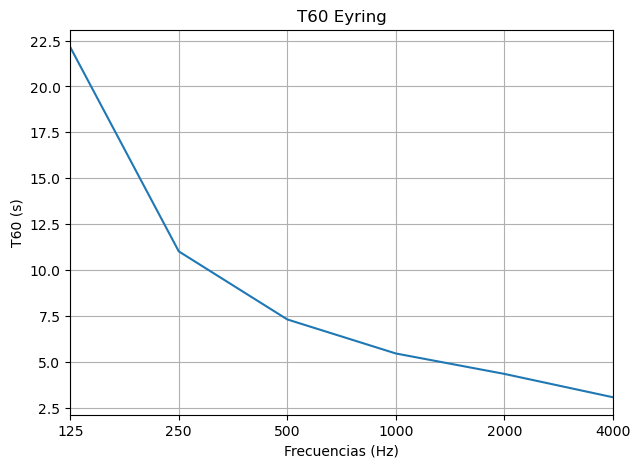

In [10]:
#Gráfica T60 Eyring
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(frec,arrayEyring)
ax.set_xlabel('Frecuencias (Hz)')
ax.set_xscale('log') # escala logaritmica eje x
ax.set_xticks(frec) # valores escala eje x
ax.set_xticklabels([str(f) for f in frec]) # etiqueta para valores eje x
ax.minorticks_off() # elimina valores sin etiqueta
ax.grid() #grilla
ax.set_ylabel('T60 (s)')
ax.set_xlim([frec[0],frec[-1]]) # limites de eje x
ax.set_title('T60 Eyring')

### Modelo de Millington 

In [11]:
#Millington

#Para crear arreglo
arrayMillington=[]

#Cálculo T60
for i in (arrayAbs): 

    alfa=(1/stot)*(sx1*np.log(1-i)+sx2*np.log(1-i)+sz3*np.log(1-i)+sz4*np.log(1-i)+sy5*np.log(1-i)+sy6*np.log(1-i))
    T60=(-0.161*V)/(stot*alfa)
    
    arrayMillington.append(T60)
    
print(arrayMillington)

[22.137580948048065, 11.012886541152739, 7.304527657971886, 5.450251172846596, 4.337606429232565, 3.065839870349949]


Text(0.5, 1.0, 'T60 Millington')

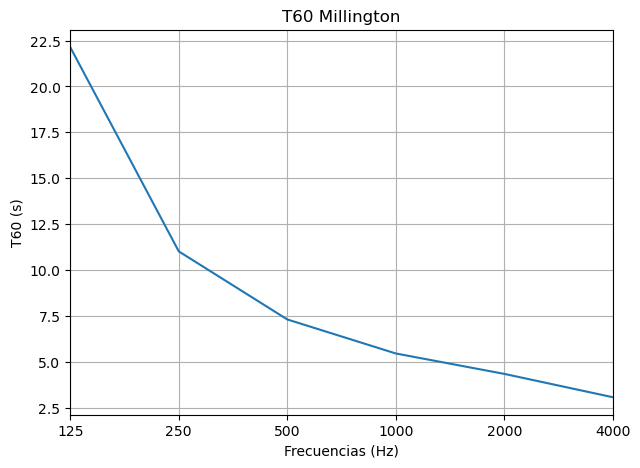

In [12]:
#Gráfica T60 Millington
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(frec,arrayMillington)
ax.set_xlabel('Frecuencias (Hz)')
ax.set_xscale('log') # escala logaritmica eje x
ax.set_xticks(frec) # valores escala eje x
ax.set_xticklabels([str(f) for f in frec]) # etiqueta para valores eje x
ax.minorticks_off() # elimina valores sin etiqueta
ax.grid() #grilla
ax.set_ylabel('T60 (s)')
ax.set_xlim([frec[0],frec[-1]]) # limites de eje x
ax.set_title('T60 Millington')

### Modelo Arau-Puchades

In [13]:
#Arau-Puchades

#Para crear arreglo
arrayArau=[]

#Cálculo T60
for i in(arrayAbs): 

    sx=sx1+sx2
    sy=sy5+sy6
    sz=sz3+sz4

    s=sx+sy+sz

    ax=((i*sx1)+(i*sx2))/sx
    ay=((i*sy5)+(i*sy6))/sx
    az=((i*sz3)+(i*sz4))/sx

    T60x=((0.161*V)/(-s*np.log(1-ax)))**(sx/s)
    T60y=((0.161*V)/(-s*np.log(1-ay)))**(sy/s)
    T60z=((0.161*V)/(-s*np.log(1-az)))**(sz/s)
    
    T60=T60x*T60y*T60z
    
    arrayArau.append(T60)
    
print(arrayArau)


[15.629828627864772, 7.755724310396684, 5.130764802276034, 3.8180853455352843, 3.0303127119698487, 2.129631710876723]


Text(0.5, 1.0, 'T60 Arau-Puchades')

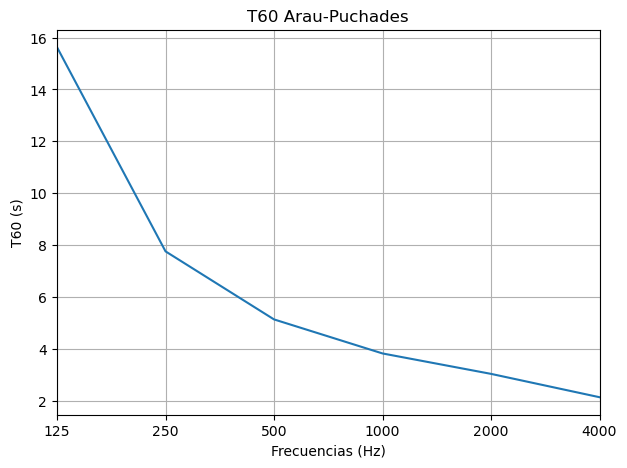

In [14]:
#Gráfica T60 Arau-Puchades
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(frec,arrayArau)
ax.set_xlabel('Frecuencias (Hz)')
ax.set_xscale('log') # escala logaritmica eje x
ax.set_xticks(frec) # valores escala eje x
ax.set_xticklabels([str(f) for f in frec]) # etiqueta para valores eje x
ax.minorticks_off() # elimina valores sin etiqueta
ax.grid() #grilla
ax.set_ylabel('T60 (s)')
ax.set_xlim([frec[0],frec[-1]]) # limites de eje x
ax.set_title('T60 Arau-Puchades')

### Modelo Fritzroy 

In [15]:
#Nuevas superficies

#Modelo debe ser rectangular, se modifican las dimensiones para que sea rectangular, pero con el mismo volumen

F_sx1= (h1-1)*(w1+2)
F_sx2= (h1-1)*(w1+2)
F_sz3= (h1)*(w1+2)
F_sz4= (h1)*(w1+2)
F_sy5= (h1-1)*(h1+1)
F_sy6= (h1-1)*(h1+1)

F_stot=F_sx1+F_sx2+ F_sz3+ F_sz4+ F_sy5+ F_sy6

print(F_sx1,F_sx2, F_sz3, F_sz4, F_sy5, F_sy6)
print(F_stot)

108 108 126 126 48 48
564


In [16]:
#Volumen 
F_v=F_sx1*(h1)
F_v

756

In [17]:
#Fritzroy

#Para crear arreglo
arrayFritzroy=[]

#Cálculo T60
for i in (arrayAbs): 

    #ax=(F_sx1*i+F_sx2*i)/F_stot
    #ay=(F_sy5*i+F_sy6*i)/F_stot
    #az=(F_sz3*i+F_sz4*i)/F_stot

    ax=(i*F_sx1+i*F_sx2)/(F_sx1+F_sx2)  #no se si saqué bien los coef. de abs. promedio
    ay=(i*F_sy5+i*F_sy6)/(F_sy5+F_sy6)
    az=(i*F_sz3+i*F_sz4)/(F_sz3+F_sz4)
    
    sx=F_sx1+F_sx2
    sy=F_sy5+F_sy6
    sz=F_sz3+F_sz4

    T60=((0.161*F_v)*((sx/(-F_stot*np.log(1-ax)))+(sy/(-F_stot*np.log(1-ay)))+(sz/(-F_stot*np.log(1-az))))/F_stot)
    
    arrayFritzroy.append(T60)
    
print(arrayFritzroy)

[21.472766063147237, 10.682157952719148, 7.085164994743878, 5.286574386540997, 4.20734353710525, 2.9737694681992224]


Text(0.5, 1.0, 'T60 Fritzroy')

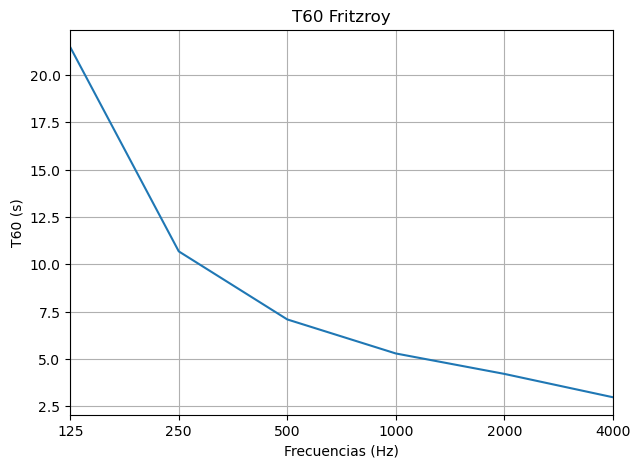

In [18]:
#Gráfica T60 Fritzroy
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(frec,arrayFritzroy)
ax.set_xlabel('Frecuencias (Hz)')
ax.set_xscale('log') # escala logaritmica eje x
ax.set_xticks(frec) # valores escala eje x
ax.set_xticklabels([str(f) for f in frec]) # etiqueta para valores eje x
ax.minorticks_off() # elimina valores sin etiqueta
ax.grid() #grilla
ax.set_ylabel('T60 (s)')
ax.set_xlim([frec[0],frec[-1]]) # limites de eje x
ax.set_title('T60 Fritzroy')

# MODELO FRITZROY DE NUEVO

### Aquí se presenta otra forma de aplicar el modelo

In [19]:
#Fritzroy

#Para crear arreglo
Fritzroy=[]

#Cálculo T60
for i in (arrayAbs): 


    ax=(i*sx1+i*sx2)/(sx1+sx2)  
    ay=(i*sy5+i*sy6)/(sy5+sy6)
    az=(i*sz3+i*sz4)/(sz3+sz4)
    
    sx=sx1+sx2
    sy=sy5+sy6
    sz=sz3+sz4

    T60=((0.161*V)*((sx/(stot*np.log(1-ax)))+(sy/(-stot*np.log(1-ay)))+(sz/(-stot*np.log(1-az))))/stot)
    
    Fritzroy.append(T60)
    
print(Fritzroy)

[11.130754167071743, 5.537268640466905, 3.67270940118822, 2.740380988153946, 2.180944293353544, 1.5415013046166348]


Text(0.5, 1.0, 'T60 Fritzroy')

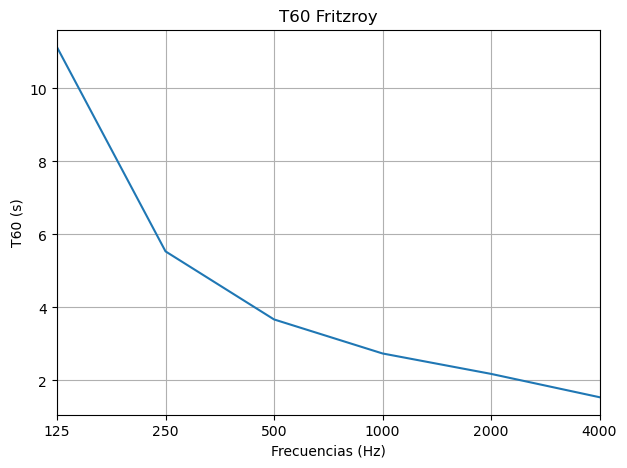

In [20]:
#Gráfica T60 Fritzroy
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(frec,Fritzroy)
ax.set_xlabel('Frecuencias (Hz)')
ax.set_xscale('log') # escala logaritmica eje x
ax.set_xticks(frec) # valores escala eje x
ax.set_xticklabels([str(f) for f in frec]) # etiqueta para valores eje x
ax.minorticks_off() # elimina valores sin etiqueta
ax.grid() #grilla
ax.set_ylabel('T60 (s)')
ax.set_xlim([frec[0],frec[-1]]) # limites de eje x
ax.set_title('T60 Fritzroy')

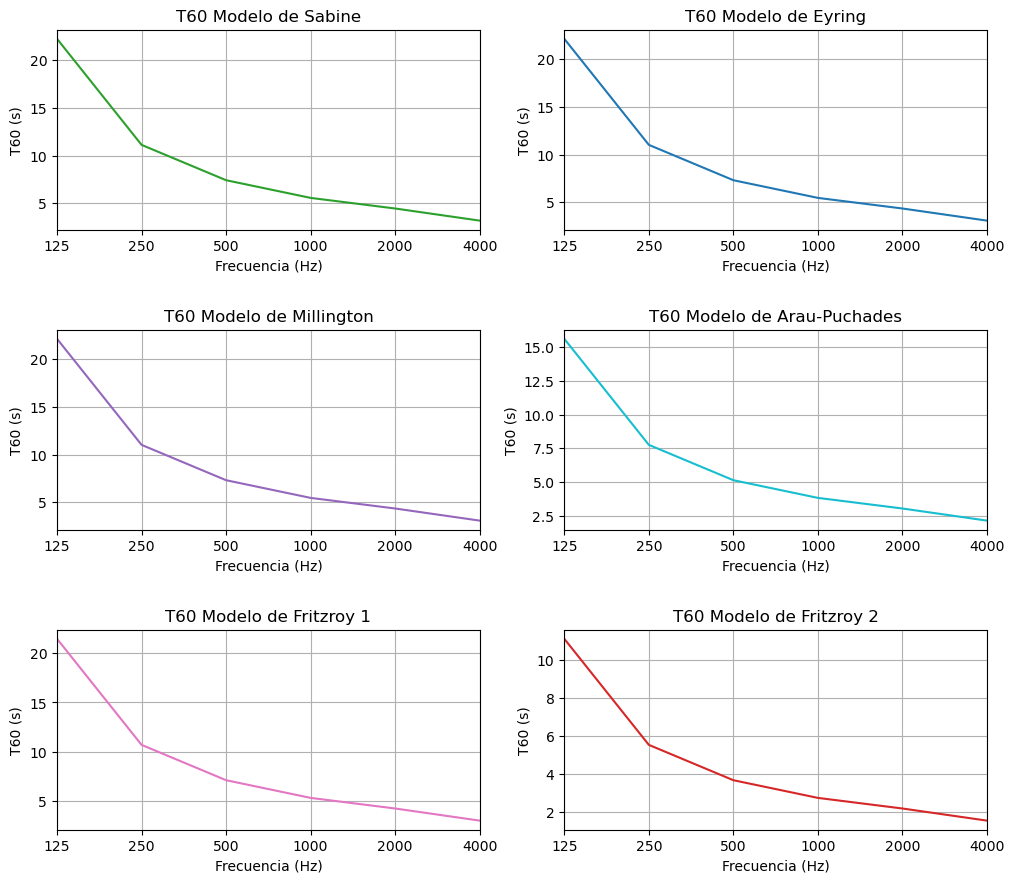

In [21]:

fig, axs = plt.subplots(3, 2, figsize=(12, 10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5) #detalles de los tamaños

#Grafica1 
axs[0,0].plot(frec, arraySabine, 'tab:green')
axs[0,0].set_title('T60 Modelo de Sabine')


#Grafica2  
axs[0,1].plot(frec, arrayEyring, 'tab:blue')
axs[0,1].set_title('T60 Modelo de Eyring')

#Grafica3 
axs[1,0].plot(frec, arrayMillington, 'tab:purple')
axs[1,0].set_title('T60 Modelo de Millington')

#Grafica4
axs[1,1].plot(frec, arrayArau, 'tab:cyan')
axs[1,1].set_title('T60 Modelo de Arau-Puchades')

#Grafica5
axs[2,0].plot(frec, arrayFritzroy, 'tab:pink')
axs[2,0].set_title('T60 Modelo de Fritzroy 1')

#Grafica6
axs[2,1].plot(frec, Fritzroy, 'tab:red')
axs[2,1].set_title('T60 Modelo de Fritzroy 2')

#Detalle de los ejes
for ax in axs.flat:
    ax.set(xlabel='Frecuencia (Hz)', ylabel='T60 (s)')
    ax.set_xscale('log') # escala logaritmica eje x
    ax.set_xticks(frec) # valores escala eje x
    ax.set_xticklabels([str(f) for f in frec]) # etiqueta para valores eje x
    ax.minorticks_off() # elimina valores sin etiqueta
    ax.grid() #grilla
    ax.set_xlim([frec[0],frec[-1]])

plt.savefig('42.png')